# Домашнее задание к лекции "Визуализация данных"

# Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

In [ ]:
# Требования к анализу:

# построить не менее 4 визуализаций различных видов;
# каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
# по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
# Откуда брать данные?

# Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) 
# по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). 
# Если идей нет, можете взять один из перечисленных ниже:

# данные приложений из Google Play;
# данные о видео из трендов YouTube;
# данные об уровне счастья в разных странах;
# данные по фильмам и сериалам Netflix.

In [3]:
netflix_df = pd.read_csv('netflix_titles.csv')

In [4]:
netflix_df.head(40)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [61]:
# Переведем длительность фильмов в int 
netflix_df_only_movies = netflix_df.loc[netflix_df.type == 'Movie']
def movie_duration(row):
    row = int(row.split(' ')[0])
    return row

netflix_df_only_movies['duration'] = netflix_df_only_movies['duration'].apply(movie_duration)

<AxesSubplot:title={'center':'sdsd'}, xlabel='release_year', ylabel='duration'>

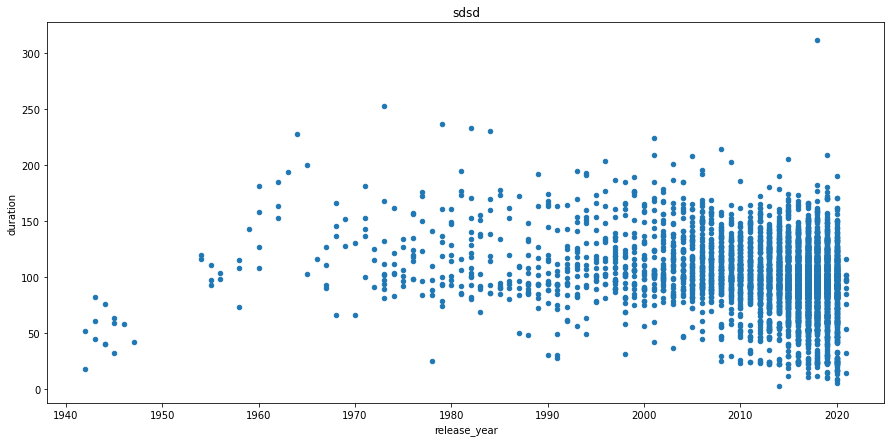

In [108]:
# Сделаем точечню диаграмму для изучения взаимосвязи между годом выпуска и длительностью фильмов
netflix_df_only_movies.plot(kind='scatter',
                            x='release_year',
                            y='duration',
                            title='sdsd')

In [ ]:
# Из диаграммы можно сделать следующие наблюдения:
# 1) На Нетфликсе мало корометражек и фильмов длительностью около 1 часа, выпущенных до 2010 года;
# 2) Можно предположить, что примерно с 2010 короткометражки и фильмы длительностью около 1 часа становятся 
#    гораздо более популярными, поэтому Нетфликс разместил большое количество таких фильмов на своем сервисе 

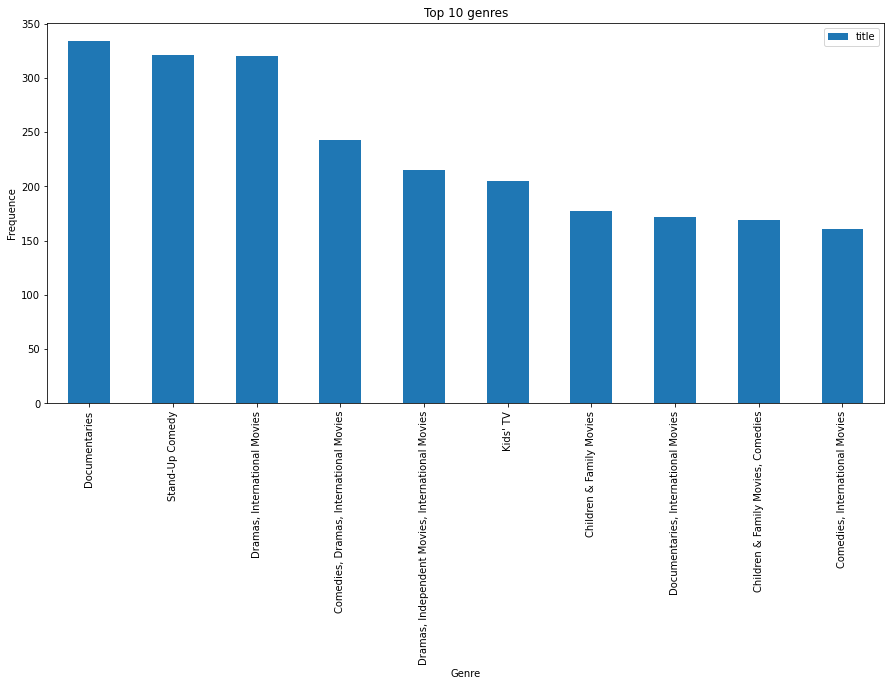

In [109]:
# Столбчатая диаграмма для визуализации самых популярных жанров
top10_genres = netflix_df[['title', 'listed_in']].groupby('listed_in').count().sort_values(by='title', ascending=False).head(10)
top10_genres = top10_genres.plot(kind='bar', title='Top 10 genres', xlabel='Genre', ylabel='Frequence')

In [ ]:
# Из столбчатой диаграммы можно сделать следующие наблюдения:
# 1) Наиболее представленным на Нетфликс жанром является документальное кино (сериалы);
# 2) Также значительное представительство у стэнд-ап комедий и драм;
# 3) Вероятно, что полученные топ жанры являются наиболее популярными у пользователей Нетфликс. 
#    Однако, для подтверждения этой гипотезы нужно посмотреть на дополнительные данные (оценки пользователей и 
#    количество просмотров), которые у нас отсутствуют.
# 4) Деятелям кино, которые хотят сотрудничать с Нетфликс такая диаграмма может помочь определиться с теми жанрами, 
#    в которых они будут создавать кино, так как вероятно, что для Нетфликс указанные жанры наиболее интересны.

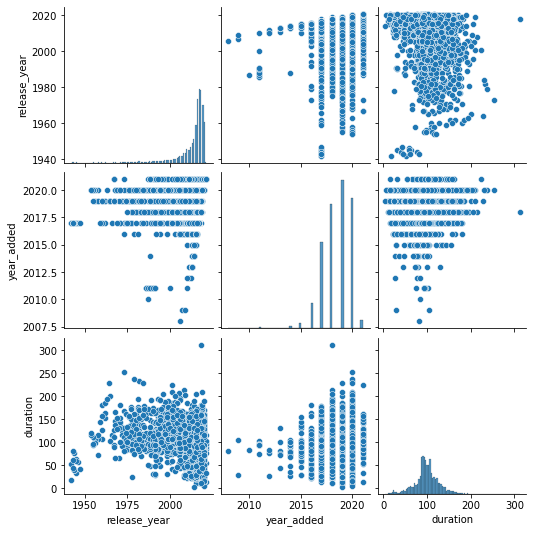

In [141]:
# Построим scatter plot matrix для показателей года выпуска фильма, года добавления на Нетфликс и его длительности
# Для начала найдем год добавления на Нетфликс:
def year_added(row):
    if type(row) != float:
        row = row.replace(',', '').split(' ')
        row = int(row[2])
        return row
    else:
        row = None
        return row
    
netflix_df_only_movies['year_added'] = netflix_df_only_movies['date_added'].apply(year_added)

# Теперь посмотрим сам scatter plot matrix:

sns.pairplot(netflix_df_only_movies[['release_year', 'year_added', 'duration']])

In [ ]:
# Из матричной точечной диаграмы можно сделать следующие гипотезы:
# 1) Вплоть до 2015 года более выгодно было размещать современные (снятые после 1980 г.) фильмы. 
#    Примерно с 2016 года возросла популярность старого кино (до 1980 г.) и Нетфликс активно начал размещать такие
#    фильмы на своем сервисе.
# 2) Примерно с 2015 года становятся популярными более длительные фильмы, так как Нетфликс начинает добавлять 
#    больше фильмов, длительность которых превышает 150 мин.

In [86]:
import re

# Создадим датафрейм с данными только по сериалам

netflix_df_only_tv_shows = netflix_df.loc[netflix_df.type == 'TV Show']

# Получим информацию по количеству сезонов сериалов

def tv_shows_duration(row):
    row = re.findall(r'\d', row)
    return int(''.join(row))

netflix_df_only_tv_shows['duration'] = netflix_df_only_tv_shows['duration'].apply(tv_shows_duration)

<AxesSubplot:title={'center':'Количество сезонов'}, ylabel='Frequency'>

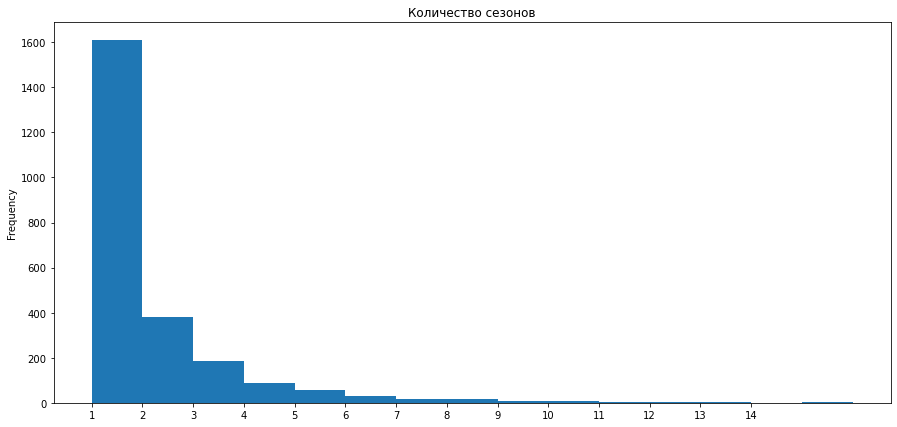

In [107]:
# Гистограмма по количеству сезонов сериалов

netflix_df_only_tv_shows.duration.plot(kind='hist', 
                                       bins=15, 
                                       title='Количество сезонов', 
                                       xlabel='duration', 
                                       ylabel='rating',
                                       xticks=range(1, 15))

In [ ]:
# Видим, что больше всего сериалов на Нетфликс имеют только 1 сезон.
# Можно предположить, что:
# 1) Нетфликс размещает только успешные сезоны сериалов, не размещая тех сезонов, которые получали у критиков или 
#    зрителей низкие оценки;
# 2) В основном на Нетфликс размещаются сериалы, в которых имеется только 1 сезон (мини-сериалы).

# Дополнительная часть (необязательная)

In [ ]:
# построить дополнительно не менее 2 визуализаций (итого не менее 6);
# в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='rating', ylabel='country'>

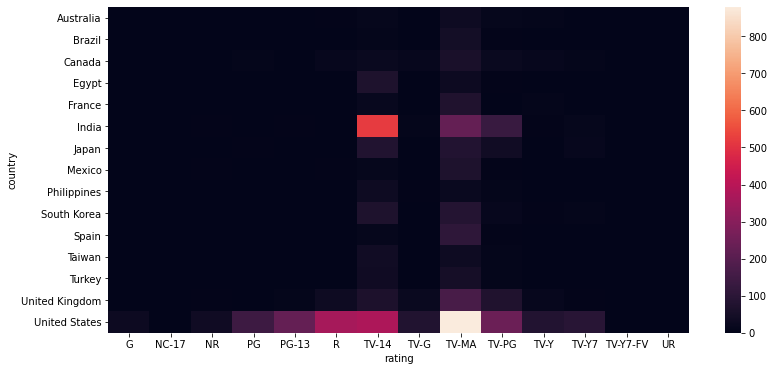

In [44]:
# Построим Heatmap по топ-15 странам для анализа того, фильмы с каким возрастным рейтингом чаще добавляются на Netflix

# Список топ-15 стран, чьи фильмы представлены на Netflix
top_countries = netflix_df.country.value_counts().sort_values(ascending=False).head(15).index.values

# Таблица с количеством фильмов каждого возрастного рейтинга по каждой из топ-15 стран
countries_top15 = netflix_df[netflix_df.country.isin(top_countries)].pivot_table(index='country', columns='rating', 
                                                                                values='title', aggfunc='count').fillna(0)
sns.heatmap(countries_top15)

In [ ]:
# Можно сделать следующие гипотезы:
# 1) Самым популярным кино, которое снимают в топ-15 странах, представленных на Нетфликсе, является кино с 
#    рейтингами TV-14 и TV-MA. 
# 2) Наиболее разнообразные фильмы и сериалы, которые направлены на различную аудиторию, снимают в США.
# 3) Нетфликс наибольшее внимание уделяет работе с пользователями, достигшими совершеннолетия, так как
#    рейтинг TV-MA превалирует. Соответственно, можно предположить, что основной контект сервиса не предназначен
#    для детей.

<AxesSubplot:xlabel='country', ylabel='duration'>

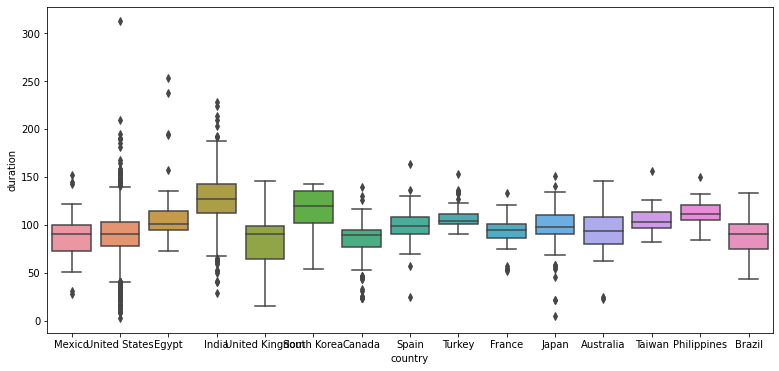

In [64]:
# Построим boxplot, чтобы сравнить продолжительность фильмов по топ-15 странам.
sns.boxplot(x='country', y='duration', data=netflix_df_only_movies[netflix_df_only_movies.country.isin(top_countries)])

In [142]:
# Гипотезы и наблюдения:
# 1) Самые долгие и самые короткие фильмы снимаются в США (большое количество выбросов);
# 2) В среднем кино из Индии более продолжительное, чем кино из других стран (уровень медианы выше, чем в других странах)
# 3) Самый большой разброс у кино из Индии - можно предположить, что в Индии умеют снимать как продолжительные фильмы,
#    так и короткометражки и фильмы средней длительности.
# 4) Активнее всего снимают короткометражки в Великобритании.